In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [9]:
#load data
data = pd.read_csv('world.csv')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [10]:
#check for null values
data.isnull().sum()

#drop null values
data.dropna(inplace=True)

#check for null values
data.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [11]:
#check for duplicates
data.duplicated().sum()

0

<Axes: >

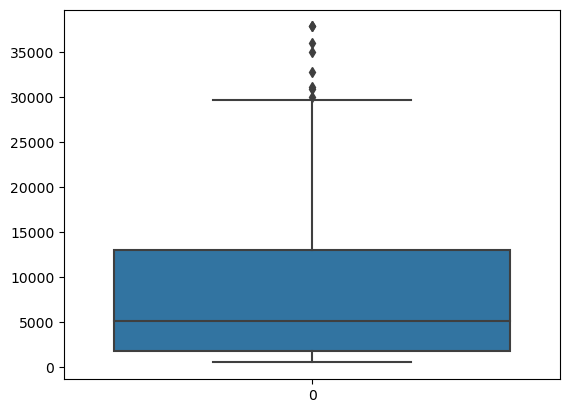

In [12]:
#check for outliers
sns.boxplot(data['GDP ($ per capita)'])

In [13]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

/tmp/ipykernel_24887/1255257098.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()


,GDP ($ per capita)
Region,
ASIA (EX. NEAR EAST),3800.0
BALTICS,11250.0
C.W. OF IND. STATES,3450.0
EASTERN EUROPE,9350.0
LATIN AMER. & CARIB,6300.0
NEAR EAST,12450.0
NORTHERN AFRICA,6000.0
NORTHERN AMERICA,36900.0
OCEANIA,5700.0


In [15]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

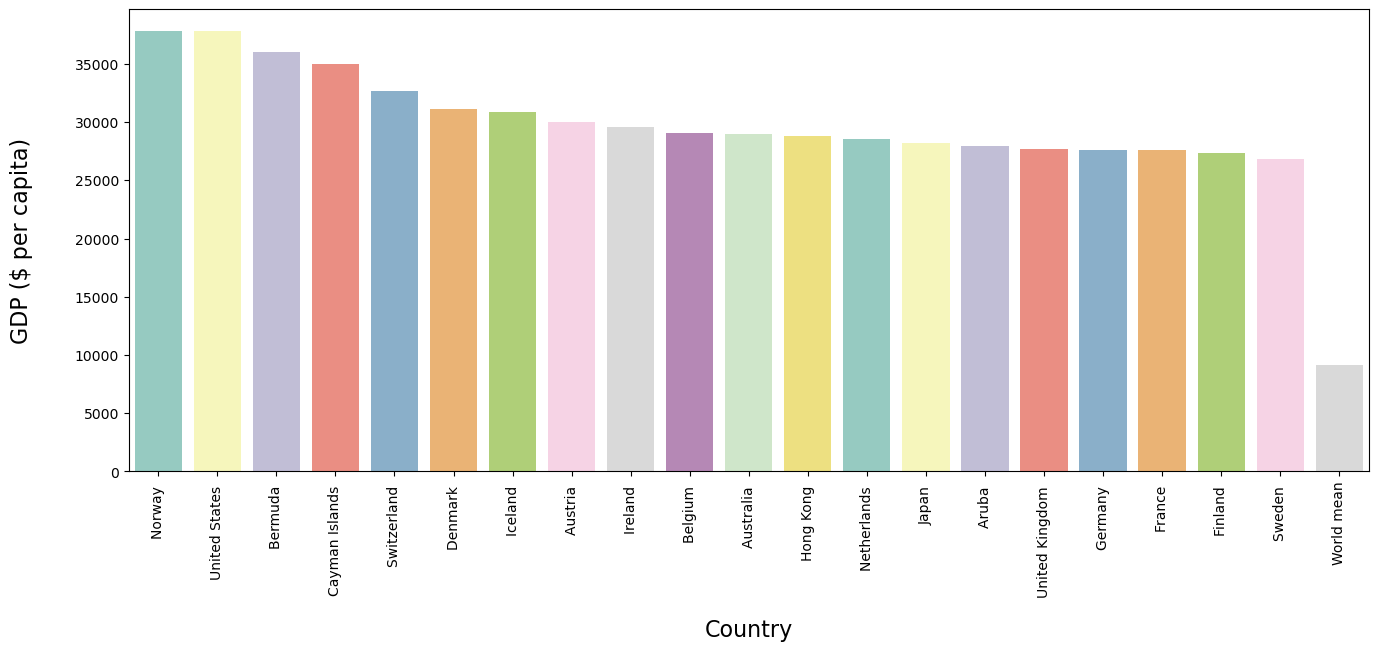

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_24887/1714301119.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


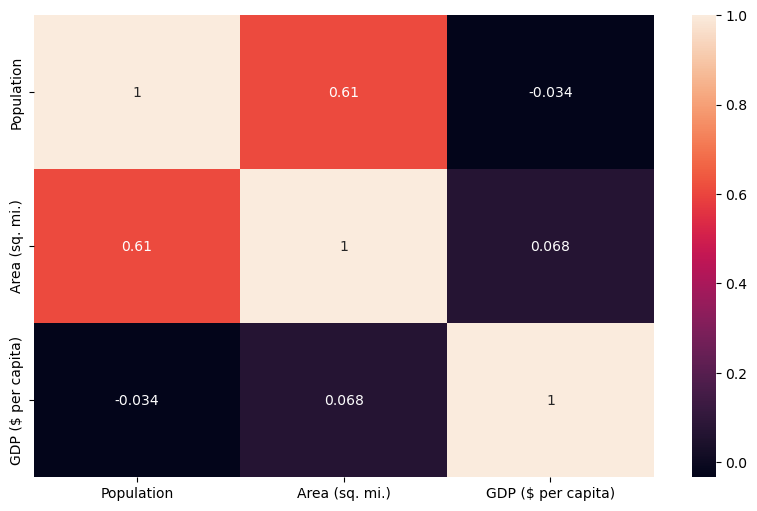

In [18]:
#The heatmap shows the correlation between all numerical columns.
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()


/tmp/ipykernel_24887/3064687095.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

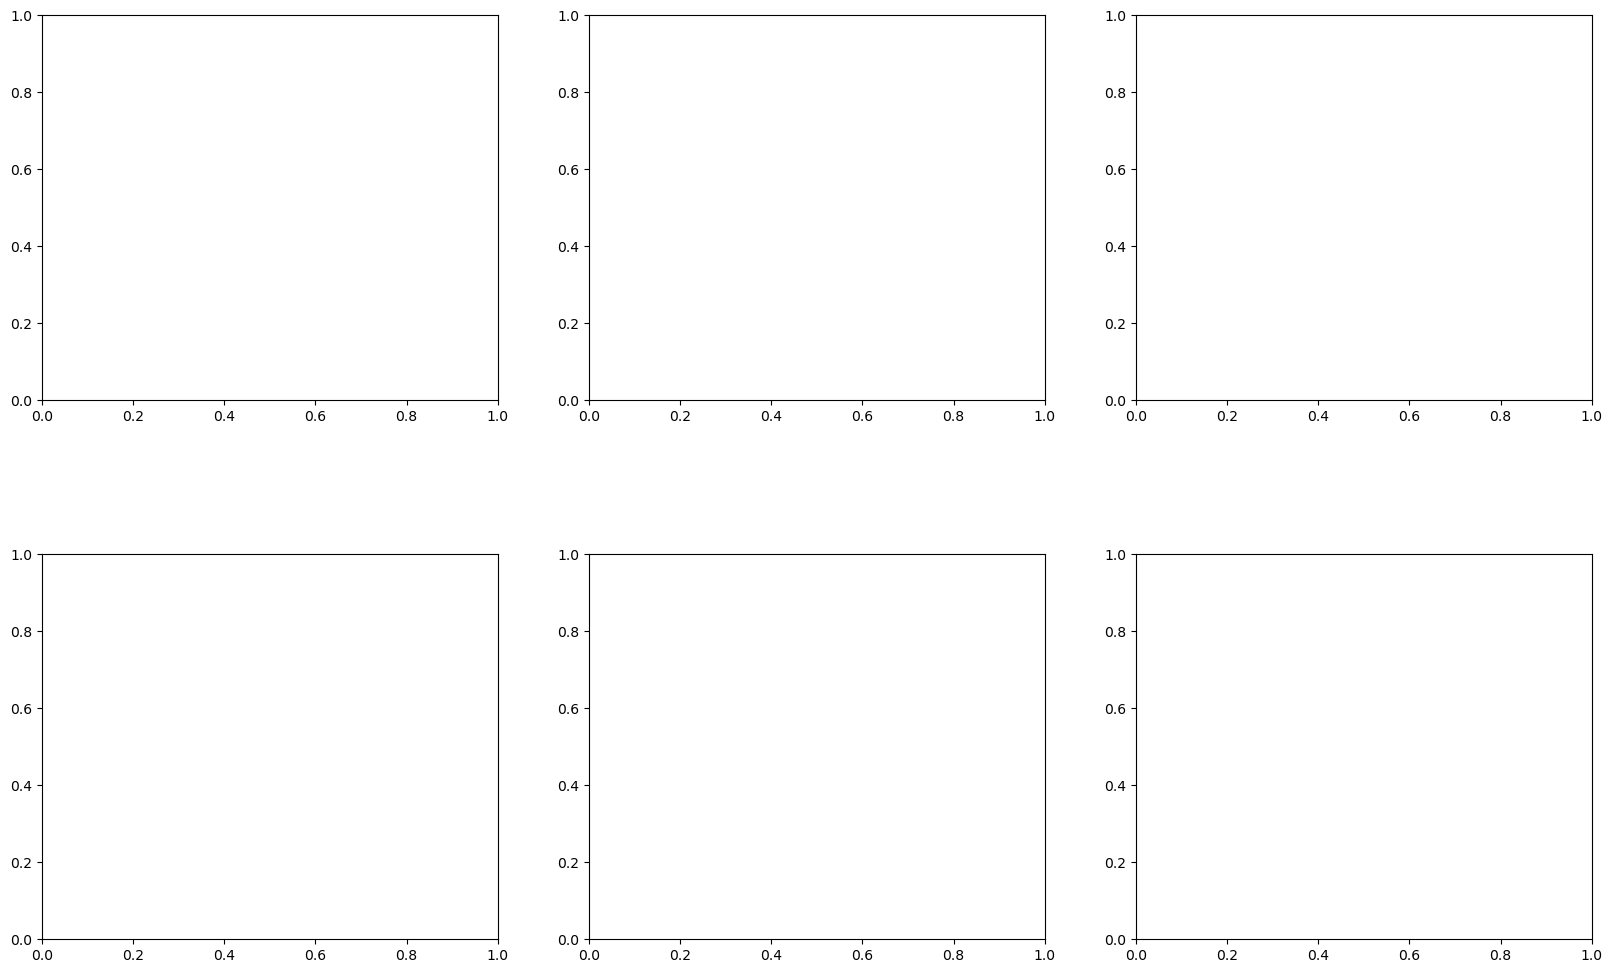

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
corr_to_gdp = corr_to_gdp.sort_values(ascending=False)

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j],y='GDP ($ per capita)',data=data,ax=axes[i,j])
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),labelpad=15)
        axes[i,j].set_ylabel(axes[i,j].get_ylabel(),labelpad=30)
        axes[i,j].xaxis.label.set_fontsize(16)
        axes[i,j].yaxis.label.set_fontsize(16)
        
plt.show()
    